In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import silhouette_score

In [2]:
data=pd.read_csv('data/data.csv')
submission=pd.read_csv('data/sample_submission.csv')
data.head(5)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [5]:
data.dtypes

id        int64
f_00    float64
f_01    float64
f_02    float64
f_03    float64
f_04    float64
f_05    float64
f_06    float64
f_07      int64
f_08      int64
f_09      int64
f_10      int64
f_11      int64
f_12      int64
f_13      int64
f_14    float64
f_15    float64
f_16    float64
f_17    float64
f_18    float64
f_19    float64
f_20    float64
f_21    float64
f_22    float64
f_23    float64
f_24    float64
f_25    float64
f_26    float64
f_27    float64
f_28    float64
dtype: object

In [3]:
# normalize
scaler=StandardScaler()
scaler.fit(data)
data_scaled=scaler.transform(data)

In [5]:
%%time
kmeans=KMeans(n_clusters=4)
kmeans.fit(data_scaled)
# predict
pred=kmeans.predict(data_scaled)

CPU times: user 7.12 s, sys: 1.44 s, total: 8.56 s
Wall time: 2.3 s


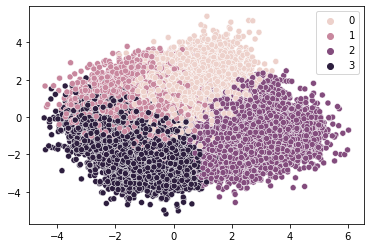

In [6]:
# pca to 2
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(data_scaled)
data_pca=pca.transform(data_scaled)
# visualize
import matplotlib.pyplot as plt
sns.scatterplot(x=data_pca[:,0],y=data_pca[:,1],hue=pred)
plt.show()


/home/studio-lab-user/.conda/envs/stat/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

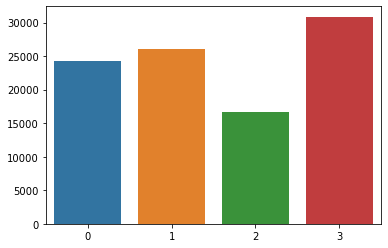

In [7]:
# count unique pred
pred_count=pd.Series(pred).value_counts()
# bar plot
sns.barplot(pred_count.index,pred_count.values)

In [8]:
submission['Predicted']=pred
submission.to_csv('data/submission.csv',index=False)

With 4 clusters score is 0.22 with 3 it was 0.17. We can find the optimal number of clusters by looking at the graph otherwise silhouette_score approach will takes forever.

In [9]:
# clusters=[ 3,5,7,9]
# scores=[]
# for i in clusters:
#     print(i)
#     kmeans=KMeans(n_clusters=i)
#     kmeans.fit(data_scaled)
#     scores.append(silhouette_score(data_scaled,kmeans.labels_))
# # plot
# plt.plot(clusters,scores)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.show()

/home/studio-lab-user/.conda/envs/stat/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

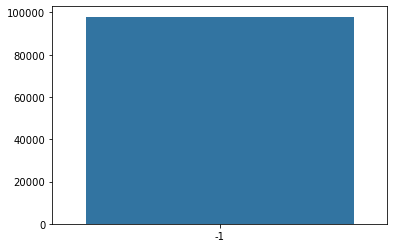

In [35]:
# # DBSCAN need improvement not finding clusters!
# from sklearn.cluster import DBSCAN
# dbscan=DBSCAN(eps=0.1, min_samples=20,n_jobs=-1)
# dbscan.fit(data)
# pred_dbscan=dbscan.labels_
# # count unique pred
# pred_count_dbscan=pd.Series(pred_dbscan).value_counts()
# # bar plot
# sns.barplot(pred_count_dbscan.index,pred_count_dbscan.values)

In [ ]:
# # guassian mixture model
# from sklearn.mixture import GaussianMixture
# bic_score={}
# for covariance in ['spherical', 'tied', 'diag', 'full']:
#     for i in range(1,12):
#         gmm=GaussianMixture(n_components=i,covariance_type=covariance)
#         gmm.fit(data_scaled)
#         bic_score[covariance,i]=gmm.bic(data_scaled)

    

In [ ]:
# n_components=7 and covariance_type='full'
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=7,covariance_type='full')
gmm.fit(data_scaled)
pred_gmm=gmm.predict(data_scaled)
submission['Predicted']=pred_gmm
submission.to_csv('data/submission.csv',index=False)

The above model gives the scores of 0.50. because the data is guassian so it work best


In [9]:
# powertranform
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
pt.fit(data)
data_pt=pt.transform(data)
data_pt=pd.DataFrame(data_pt,columns=data.columns)

In [ ]:
# guassian mixture model
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=7,covariance_type='full')
gmm.fit(data_pt)
pred_gmm=gmm.predict(data_pt)
submission['Predicted']=pred_gmm
submission.to_csv('data/submission.csv',index=False)

Using PowerTransformer (that make guassian like) improve accuracy by 3 percent. Now try BayesianGaussianMixture and brute force for n components

In [ ]:
# BayesianGaussianMixture
from sklearn.mixture import BayesianGaussianMixture
bgmm=BayesianGaussianMixture(n_components=7, n_init = 5)
bgmm.fit(data_pt)
pred_bgmm=bgmm.predict(data_pt)
# pca
pca=PCA(n_components=2)
pca.fit(data_pt)
data_pca=pca.transform(data_pt)
# visualize
sns.scatterplot(x=data_pca[:,0],y=data_pca[:,1],hue=pred_bgmm)
plt.show()
submission['Predicted']=pred_bgmm
submission.to_csv('data/submission.csv',index=False)

using the above strategy we can brute force for different value and look at the pca plot to select the best value

In [6]:
submission['Predicted']=pred_bgmm
submission.to_csv('data/submission.csv',index=False)

It proves the score to 0.59 by upto 6 percent

Selecting only important features

In [10]:
feats= ['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']

In [11]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
def compute_scores(pred,data):
    # compute silhouette , calinski harabasz score and davies bouldin score

    score={}
    score['silhouette']=silhouette_score(data,pred)
    score['calinski_harabasz']=calinski_harabasz_score(data,pred)
    score['davies_bouldin']=davies_bouldin_score(data,pred)
    return score

In [ ]:
%%time
data_scaled=PowerTransformer().fit_transform(data[feats])
# guassian mixture model
from sklearn.mixture import BayesianGaussianMixture
bgmm=BayesianGaussianMixture(n_components=7, n_init = 5)
bgmm.fit(data_scaled)
pred_bgmm=bgmm.predict(data_scaled)
submission['Predicted']=pred_bgmm
submission.to_csv('data/submission.csv',index=False)
scores=compute_scores(pred_bgmm,data_scaled)
print(scores)

It improves the scores to 0.60

In [13]:
data_scaled.shape

(98000, 14)

In [ ]:
# fitting 7 different models
import time

data_scaled=PowerTransformer().fit_transform(data[feats])
data_scaled=pd.DataFrame(data_scaled,columns=feats)
predicted_probabilities=pd.DataFrame(np.zeros((data.shape[0],7)),columns=['gmm_0','gmm_1','gmm_2','gmm_3','gmm_4','gmm_5','gmm_6'])
for i in range(7):
    start=time.time()
    bgmm=BayesianGaussianMixture(n_components=7, n_init = 3,
    max_iter=300,covariance_type='full',
    random_state=i)
    sample= data_scaled.sample(45000)
    bgmm.fit(data_scaled)
    predict_proba=bgmm.predict_proba(data_scaled)
    predict_proba=pd.DataFrame(predict_proba,columns=range(1,8))

    # ensuring clusters are labeled the same value at each fit
    if i==0:
        initial_centers=bgmm.means_
    new_classes=[]
    for mean in bgmm.means_:
        new_classes.append(np.argmin(np.linalg.norm(mean-initial_centers,axis=1))+1)
    if len(new_classes) != len(set(new_classes)):
        print("iteration", i, "could not determine the cluster label mapping, skipping")
        continue
    #apply the mapping by renaming the dataframe columns representing the original labels to the new labels
    predict_proba = predict_proba.rename(columns=dict(zip(range(1,8),new_classes)))
    predicted_probabilities=predicted_probabilities.add(predict_proba,fill_value=0)
    # compute the scores
    scores=compute_scores(predicted_probabilities.idxmax(axis=1),data_scaled)
    print(scores)
    end=time.time()
    print(end-start)
#normalize the predicted probabilities
predicted_probabilities=predicted_probabilities.div(predicted_probabilities.sum(axis=1),axis=0)

{'silhouette': 0.036927060949512445, 'calinski_harabasz': 3829.549565228582, 'davies_bouldin': 3.6671367812082294}
247.81039357185364


In [32]:
# it took 30 min to we are going to save this file.
predicted_probabilities.to_csv('data/predicted_probabilities.csv',index=False)
# predicted_probabilities = pd.read_csv('data/predicted_probabilities.csv')

In [20]:
def best_class(df):
    new_df = df.copy()
    new_df["highest_prob"] = df.max(axis=1)
    new_df["best_class"] = df.idxmax(axis=1)
    new_df["second_highest_prob"] = df.apply(lambda x: x.nlargest(2).values[-1], axis=1)
    new_df["second_best_class"] = df.apply(lambda x: np.where(x == x.nlargest(2).values[-1])[0][0]+1, axis=1)
    return new_df
cluster_class_probs = best_class(predicted_probabilities)
cluster_class_probs.head()

,1,2,3,4,5,6,7,gmm_0,gmm_1,gmm_2,gmm_3,gmm_4,gmm_5,gmm_6,highest_prob,best_class,second_highest_prob,second_best_class
0,0.000473,0.012437,0.977658,4.987069e-07,0.003519,0.002511,0.003402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.977658,3,0.012437,2
1,0.003582,0.939477,0.000318,1.331262e-02,0.000012,0.025875,0.017423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.939477,2,0.025875,6
2,0.001483,0.000352,0.810159,1.060528e-08,0.187889,0.000017,0.000100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.810159,3,0.187889,5
3,0.028005,0.015007,0.000017,8.511881e-01,0.095169,0.010566,0.000047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.851188,4,0.095169,5
4,0.980489,0.019319,0.000005,8.708634e-07,0.000011,0.000003,0.000172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.980489,1,0.019319,2


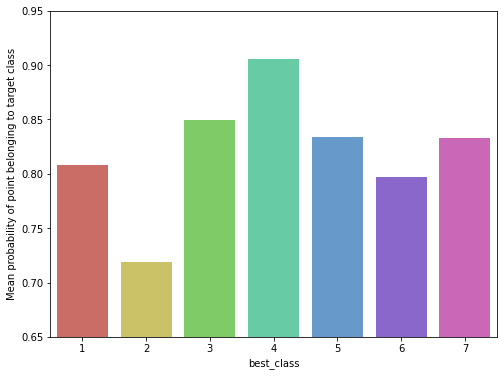

In [21]:
confidence_s = cluster_class_probs.groupby("best_class")["highest_prob"].mean()
f,ax = plt.subplots(figsize=(8,6))
sns.barplot(x=confidence_s.index, y = confidence_s.values, palette=sns.color_palette("hls", 7) );
ax.set_ylabel("Mean probability of point belonging to target class");
ax.set_ylim([0.65,0.95]);

In [25]:
confident_predictions = cluster_class_probs.loc[cluster_class_probs["highest_prob"] >= 0.85]
confident_predictions_class = confident_predictions["best_class"]
data_scaled['class'] = confident_predictions_class
train_df = data_scaled.loc[data_scaled["class"] == data_scaled["class"]]


In [35]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
X=train_df.drop(['class'],axis=1)
y=train_df['class']
# stratified k fold
lgbm=LGBMClassifier(objective='multiclass',
                            n_estimators = 5000,
                            random_state = 42,
                            learning_rate = 0.05,
                            num_leaves = 62,
                            n_jobs = -1)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []
pred_list = np.zeros((data.shape[0],7))
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lgbm.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='multi_logloss', verbose=False,early_stopping_rounds=300)
    y_pred = lgbm.predict_proba(X_test)
    pred = lgbm.predict_proba(data_scaled.drop(['class'],axis=1))
    pred_list += pred
   # scores.append(accuracy_score(y_test, y_pred))




/home/ubuntu/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/ubuntu/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/ubuntu/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stoppin

In [36]:
submission['Predicted']=pred_list.argmax(axis=1)
submission.to_csv('data/submission.csv',index=False)